In [2]:
import numpy as np
import sys, os, h5py, re
from trajencoder.bspline.bspline import CubicSpline
import matplotlib.pyplot as plt
from learning_utils import prepare_data, calc_loss_spl, spline_reconstruct

In [3]:
SPL_KNOTS = 9
X, Y, _ = prepare_data("../data/training/2-dof-no-velocity/training_SPL40_D8.hdf5")

In [4]:
Y.shape # (knots + 1) * 4 * 2

(3136, 81)

In [5]:
from algpr.gpr import GaussianProcessRegressor
from algpr.kernels import RBF as rbf

In [6]:
gpr = GaussianProcessRegressor(kernel=rbf(l=1.5))
gpr.fit(X, Y)

The evidence is:  -4286625971462.0054


-4286625971462.0054

In [7]:
Xv, Yv, Trueth = prepare_data("../data/testing/2-dof-no-velocity/validating_SPL40_D4.hdf5")

In [8]:
pred = gpr.predict(Xv)
pred.shape

(36, 81)

In [9]:
pred[4,-1]

143.42899972470406

In [10]:
error_time_l, error_with_q_l, evidence_l = [], [], []
import tqdm
for oder in tqdm.tqdm(range(1,13)):
    gpr = GaussianProcessRegressor(kernel=rbf(l=oder*0.17))
    evidence = gpr.fit(X, Y)
    pred = gpr.predict(Xv)
    error_time, error_with_q = calc_loss_spl(pred, Yv, Trueth, SPL_KNOTS)
    error_time_l.append(error_time)
    error_with_q_l.append(error_with_q)
    evidence_l.append(evidence)

  0%|          | 0/12 [00:00<?, ?it/s]/home/jiayun/MotionLearning/suboptimal_planner/learning/learning_utils.py:126: RuntimeWarning: invalid value encountered in double_scalars
  error_target_q += np.abs(q - res_q).sum() / len(q)
  8%|▊         | 1/12 [00:02<00:24,  2.24s/it]

The evidence is:  -155579174.05943164


 17%|█▋        | 2/12 [00:03<00:15,  1.59s/it]

The evidence is:  -146131446.64120603


 25%|██▌       | 3/12 [00:04<00:12,  1.40s/it]

The evidence is:  -81036385.153626


 33%|███▎      | 4/12 [00:05<00:10,  1.36s/it]

The evidence is:  -44863238.947152644


 42%|████▏     | 5/12 [00:07<00:09,  1.33s/it]

The evidence is:  -59350328.40255994


 50%|█████     | 6/12 [00:08<00:07,  1.29s/it]

The evidence is:  -382917016.5462415


 58%|█████▊    | 7/12 [00:09<00:06,  1.24s/it]

The evidence is:  -7171718942.908372


 67%|██████▋   | 8/12 [00:10<00:04,  1.21s/it]

The evidence is:  -219163532017.5859


 75%|███████▌  | 9/12 [00:11<00:03,  1.21s/it]

The evidence is:  -8164470618076.491


 83%|████████▎ | 10/12 [00:13<00:02,  1.21s/it]

The evidence is:  -313926819845264.3


 92%|█████████▏| 11/12 [00:14<00:01,  1.20s/it]

The evidence is:  -1.1353920933234178e+16


100%|██████████| 12/12 [00:15<00:00,  1.30s/it]

The evidence is:  -3.6684599220323e+17


Shape error:  1.0339753048370717 Time error:  0.002888888888888893


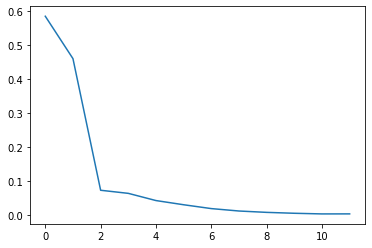

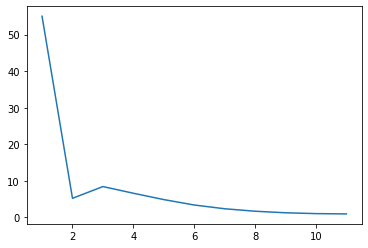

In [11]:
plt.figure()
plt.plot(error_time_l)
plt.figure()
plt.plot(error_with_q_l)
print("Shape error: ", error_with_q_l[np.argmin(error_time_l)], "Time error: ", error_time_l[np.argmin(error_time_l)])

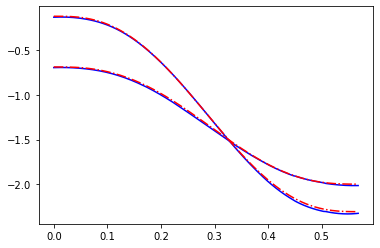

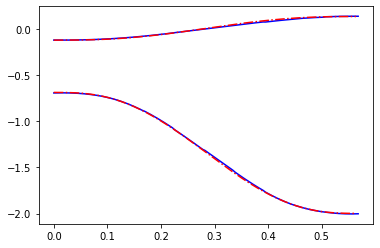

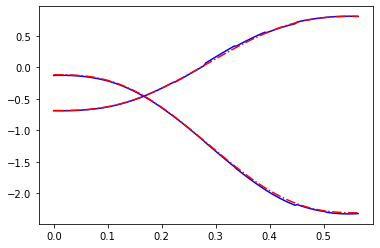

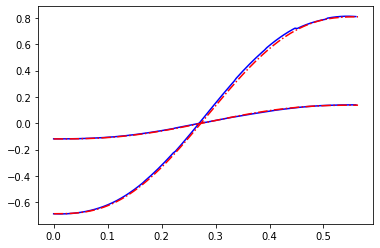

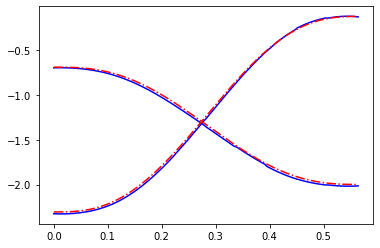

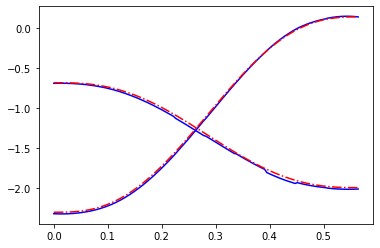

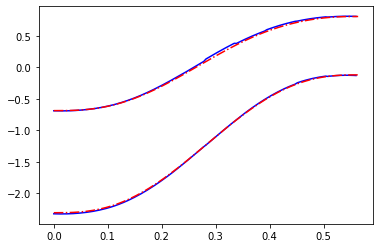

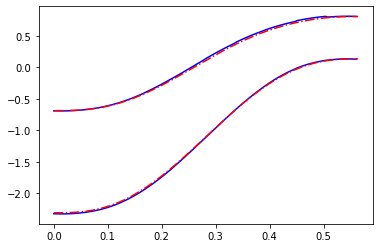

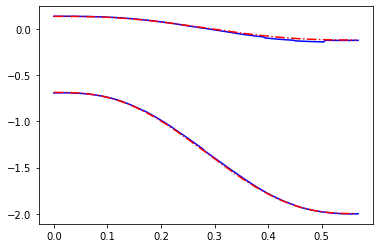

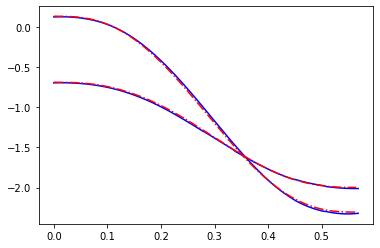

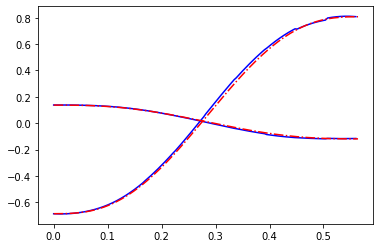

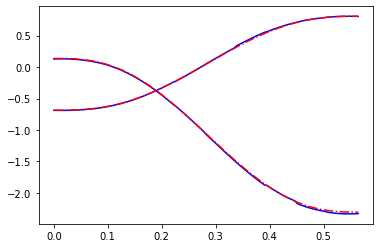

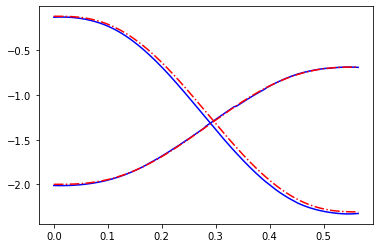

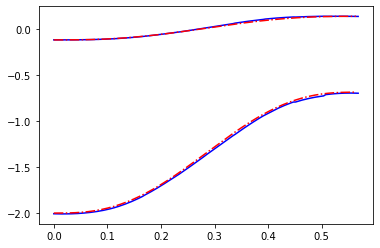

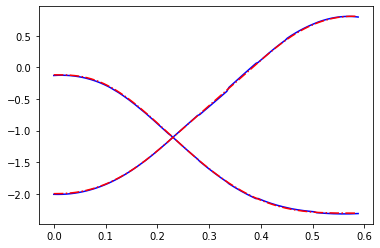

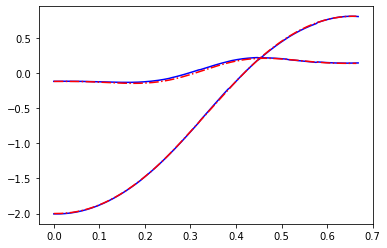

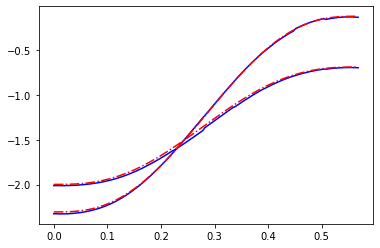

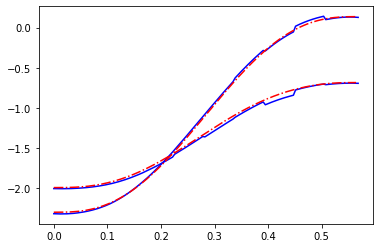

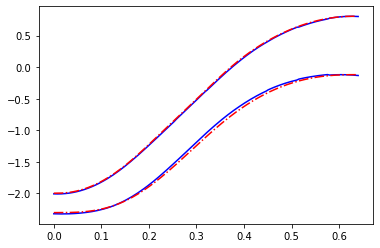

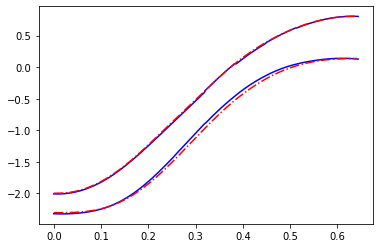

In [12]:
for index in range(0,20):
    plt.figure()
    q, t = spline_reconstruct(pred[index, 0:-1].reshape(2, 10, 4), SPL_KNOTS, int(pred[index, -1]), dt=0.004)
    plt.plot(t, q, '-b')
    time_vec = np.linspace(0, Yv[index,-1]*0.004, int(Yv[index,-1]))
    plt.plot(time_vec, Trueth[index], '-.r')